# Feshion Classification (Deep learning Project)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.keras as krs

# Load Data

In [ ]:
(X_train, y_train), (X_test, y_test) = krs.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
y_train[0]

9

In [ ]:
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
"""
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot
"""

'\n0 => T-shirt/top\n1 => Trouser\n2 => Pullover\n3 => Dress\n4 => Coat\n5 => Sandal\n6 => Shirt\n7 => Sneaker\n8 => Bag\n9 => Ankle boot\n'

# show images using matplotlib's imshow function

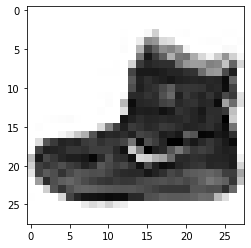

In [ ]:
plt.imshow(X_train[0], cmap="Greys")

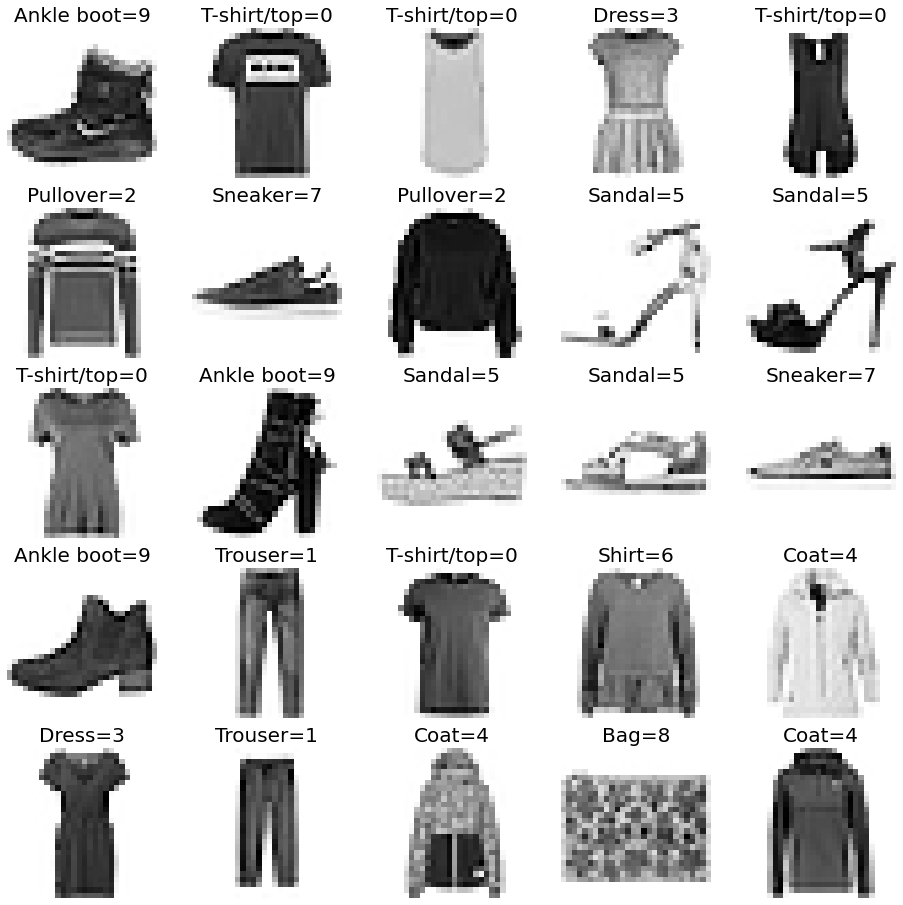

In [ ]:
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_train[i], cmap="Greys")
  plt.axis("off")
  plt.title(class_labels[y_train[i]]+"="+str(y_train[i]), fontsize=20)

# Feature Scalling

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Build Neural Network

In [ ]:
model = krs.models.Sequential([
                        krs.layers.Flatten(input_shape=[28,28]),
                        krs.layers.Dense(units=32, activation='relu'),    # Create first naural layer using 32 neuron, activation(relu) works as if the value is possitive then it remain possitive else if value is negative then it return 0 value
                        # krs.layers.Dense(units=32, activation='relu'),   # this is the hidden layar of our model, we create this layer if we want to complex our model
                        krs.layers.Dense(units=10, activation='softmax')    # Create output layer using 10 neuron because we have 10 classes of output, here softmax activation give the probability of all 10 neuron
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=1)   # epochs = 1 means the model train one time on this dataset, it increase with the value

1875/1875 [==============================] - 4s 2ms/step - loss: 0.5589 - accuracy: 0.8089


In [ ]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4132 - accuracy: 0.8554
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3760 - accuracy: 0.8657
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3552 - accuracy: 0.8722
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3381 - accuracy: 0.8771
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3248 - accuracy: 0.8825
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3138 - accuracy: 0.8858
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3067 - accuracy: 0.8867
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3000 - accuracy: 0.8909
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2922 - accuracy: 0.8928
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.286

# Test and Evaluate Neural Network Model

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3662 - accuracy: 0.8695


[0.36615580320358276, 0.8694999814033508]

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred[0].round(2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.07, 0.  , 0.9 ],
      dtype=float32)

In [ ]:
np.argmax(y_pred[0].round(2))  # find index of max element

9

In [ ]:
y_test[0]

9

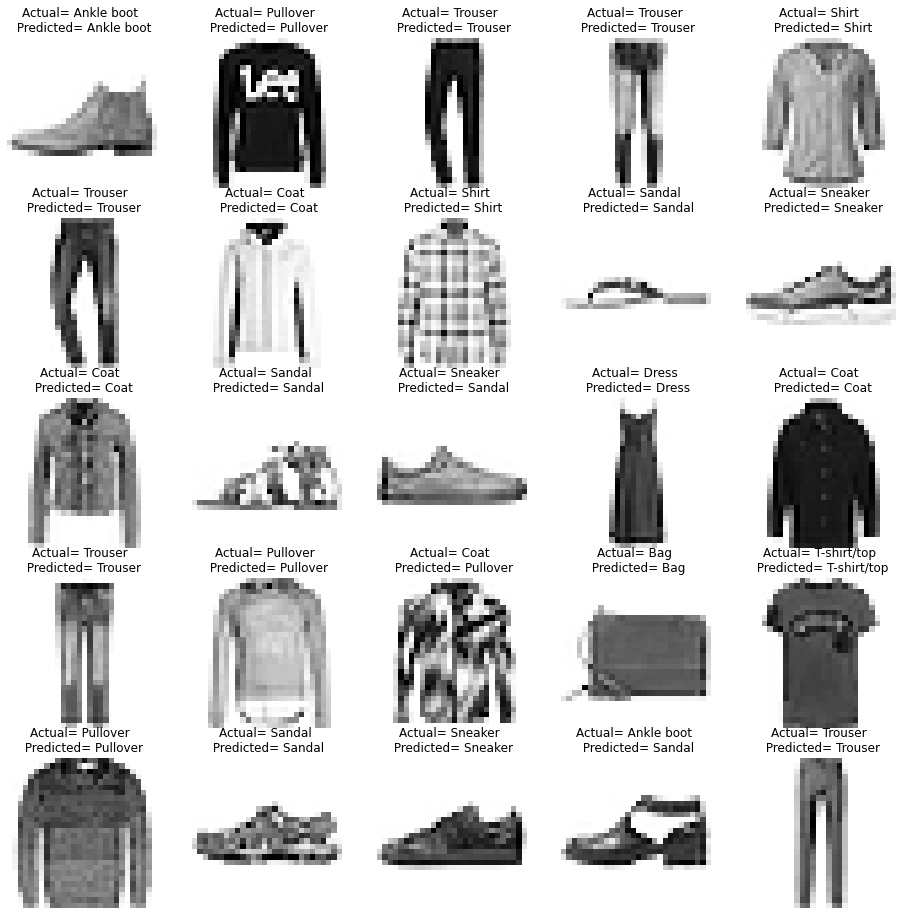

In [ ]:
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_test[i], cmap='Greys')
  plt.axis('off')
  plt.title(f"Actual= {class_labels[y_test[i]]} \n Predicted= {class_labels[np.argmax(y_pred[i].round(2))]}")

# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, [np.argmax(i) for i in y_pred])

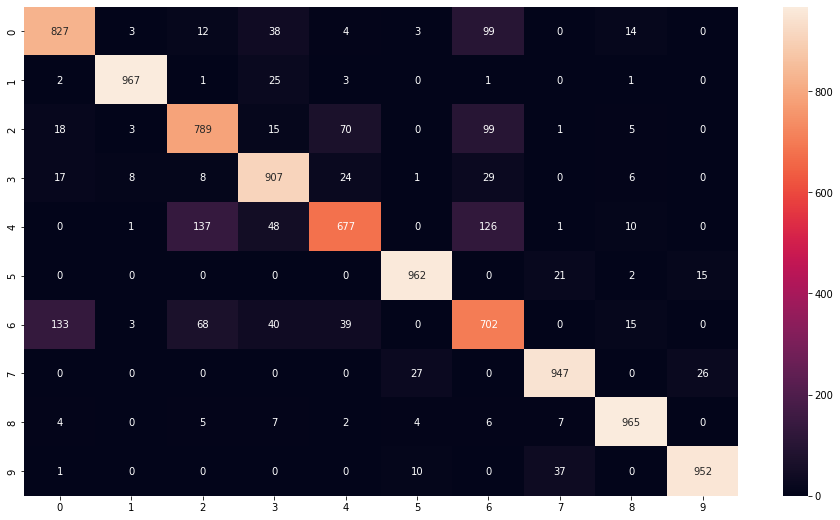

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(cm, annot=True, fmt='d')

# Classification Report

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, [np.argmax(i) for i in y_pred], target_names=class_labels)

In [ ]:
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.83      0.83      1000
     Trouser       0.98      0.97      0.97      1000
    Pullover       0.77      0.79      0.78      1000
       Dress       0.84      0.91      0.87      1000
        Coat       0.83      0.68      0.74      1000
      Sandal       0.96      0.96      0.96      1000
       Shirt       0.66      0.70      0.68      1000
     Sneaker       0.93      0.95      0.94      1000
         Bag       0.95      0.96      0.96      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



# Save Model

In [ ]:
model.save("MNIST_classifier_nn_model.h5")  # h5 is the extension

In [ ]:
model2 = krs.models.load_model('MNIST_classifier_nn_model.h5')

In [ ]:
model2.predict(X_test)

array([[1.0881888e-04, 6.1571526e-10, 2.1320812e-07, ..., 7.4948832e-02,
        3.3436902e-06, 8.9968991e-01],
       [8.9002642e-06, 2.2682844e-16, 9.9655861e-01, ..., 2.7996541e-16,
        1.1023245e-07, 6.2481262e-20],
       [7.0734122e-06, 9.9998999e-01, 1.9403954e-06, ..., 2.3703216e-14,
        5.0674642e-11, 9.2905393e-17],
       ...,
       [3.4107958e-04, 1.7698355e-10, 3.1966560e-05, ..., 1.0942450e-07,
        9.9886513e-01, 9.3065999e-11],
       [1.8438817e-07, 9.9943846e-01, 3.7726770e-07, ..., 1.8044528e-10,
        2.2658501e-08, 1.1287165e-08],
       [5.9682312e-05, 2.1489594e-08, 1.8311023e-06, ..., 1.1944519e-02,
        7.1995373e-06, 2.5148973e-05]], dtype=float32)